In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("features_30_sec_withNans.csv")
df = df.drop_duplicates() 
# Drop 'length' if it’s constant across all samples
df = df.drop(columns=['length'])
df.head()


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,NaN,1784.165850,129774.064525,2002.449060,NaN,3805.839606,9.015054e+05,...,52.420910,NaN,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,NaN,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,NaN,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,NaN,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,NaN,0.002303,1835.004266,343399.939274,1748.172116,NaN,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,NaN,NaN,-4.404827,62.910812,-11.703234,55.195160,blues


In [2]:
#check for Nans
print("\nMissing Values:\n", df.isnull().sum())

#fill Nans with mean of label
df = df.groupby('label').apply(lambda x: x.fillna(x.mean(numeric_only=True)))
print(df.shape)
df = df.reset_index(drop=True)
df.head()




Missing Values:
 chroma_stft_mean           203
chroma_stft_var            169
rms_mean                   159
rms_var                    188
spectral_centroid_mean     191
spectral_centroid_var      187
spectral_bandwidth_mean    164
spectral_bandwidth_var     183
rolloff_mean               192
rolloff_var                175
zero_crossing_rate_mean    179
zero_crossing_rate_var     192
harmony_mean               178
harmony_var                175
perceptr_mean              187
perceptr_var               174
tempo                      173
mfcc1_mean                 167
mfcc1_var                  183
mfcc2_mean                 186
mfcc2_var                  168
mfcc3_mean                 170
mfcc3_var                  182
mfcc4_mean                 180
mfcc4_var                  213
mfcc5_mean                 195
mfcc5_var                  160
mfcc6_mean                 194
mfcc6_var                  195
mfcc7_mean                 187
mfcc7_var                  188
mfcc8_mean           

C:\Users\armfi\AppData\Local\Temp\ipykernel_23056\1548361167.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label').apply(lambda x: x.fillna(x.mean(numeric_only=True)))


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002981,1784.165850,129774.064525,2002.449060,109252.049674,3805.839606,9.015054e+05,...,52.420910,-7.462140,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,68.483922,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,63.568246,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,68.483922,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.133428,0.002303,1835.004266,343399.939274,1748.172116,109252.049674,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-1.698517,64.232986,-4.404827,62.910812,-11.703234,55.195160,blues


In [59]:

print("\nDataFrame Description:\n", df.describe())
print(df.shape)



DataFrame Description:
        chroma_stft_mean  chroma_stft_var     rms_mean      rms_var  \
count       1000.000000      1000.000000  1000.000000  1000.000000   
mean           0.379045         0.086346     0.132541     0.003042   
std            0.078755         0.007219     0.062859     0.003461   
min            0.171939         0.048010     0.005276     0.000017   
25%            0.322776         0.082879     0.089494     0.001046   
50%            0.386801         0.086726     0.129138     0.001827   
75%            0.433039         0.090243     0.175939     0.003398   
max            0.663685         0.108111     0.397973     0.027679   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             1000.000000           1.000000e+03              1000.000000   
mean              2202.874881           4.658462e+05              2241.064812   
std                682.659325           3.816332e+05               501.978214   
min                5

In [4]:
# Separate features and label
X = df.drop(columns=['label'])
y = df["label"]


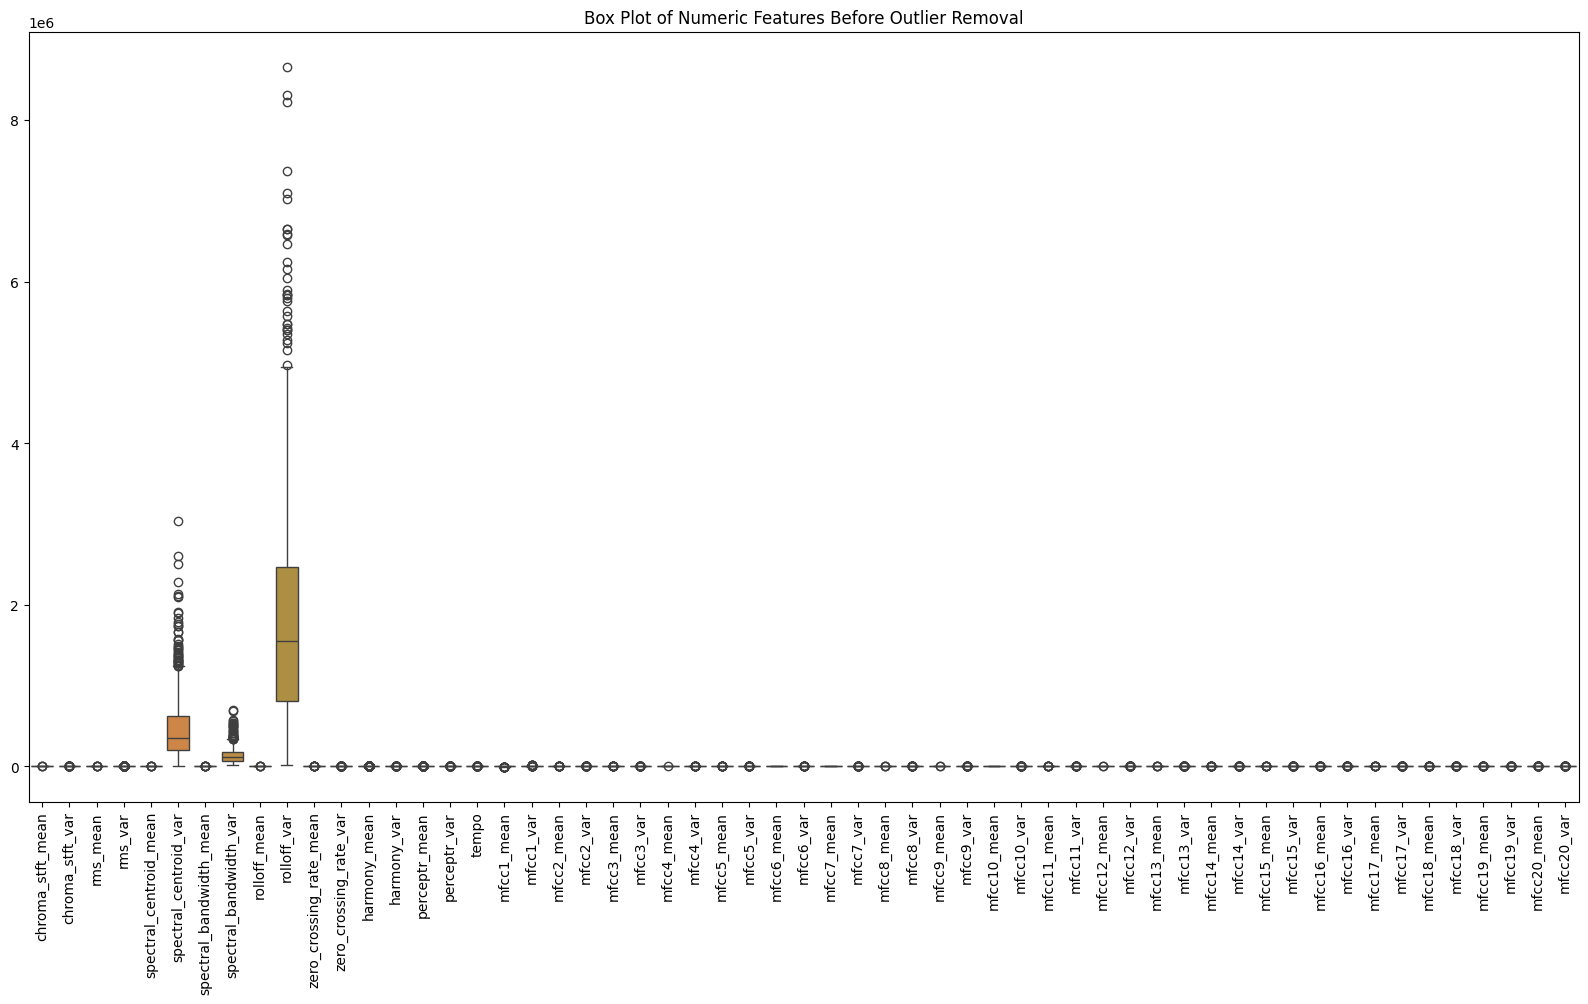

In [5]:

# Select only numeric columns for outlier detection
numeric_cols = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_cols]

# Visualize the data before outlier removal
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_numeric)
plt.title("Box Plot of Numeric Features Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()


In [6]:
# Remove anomalies using IQR method
Q1 = X_numeric.quantile(0.05)
Q3 = X_numeric.quantile(0.95)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((X_numeric < (Q1 - threshold * IQR)) | (X_numeric > (Q3 + threshold * IQR)))
X_clean = X[~outliers.any(axis=1)]
y_clean = y[~outliers.any(axis=1)]





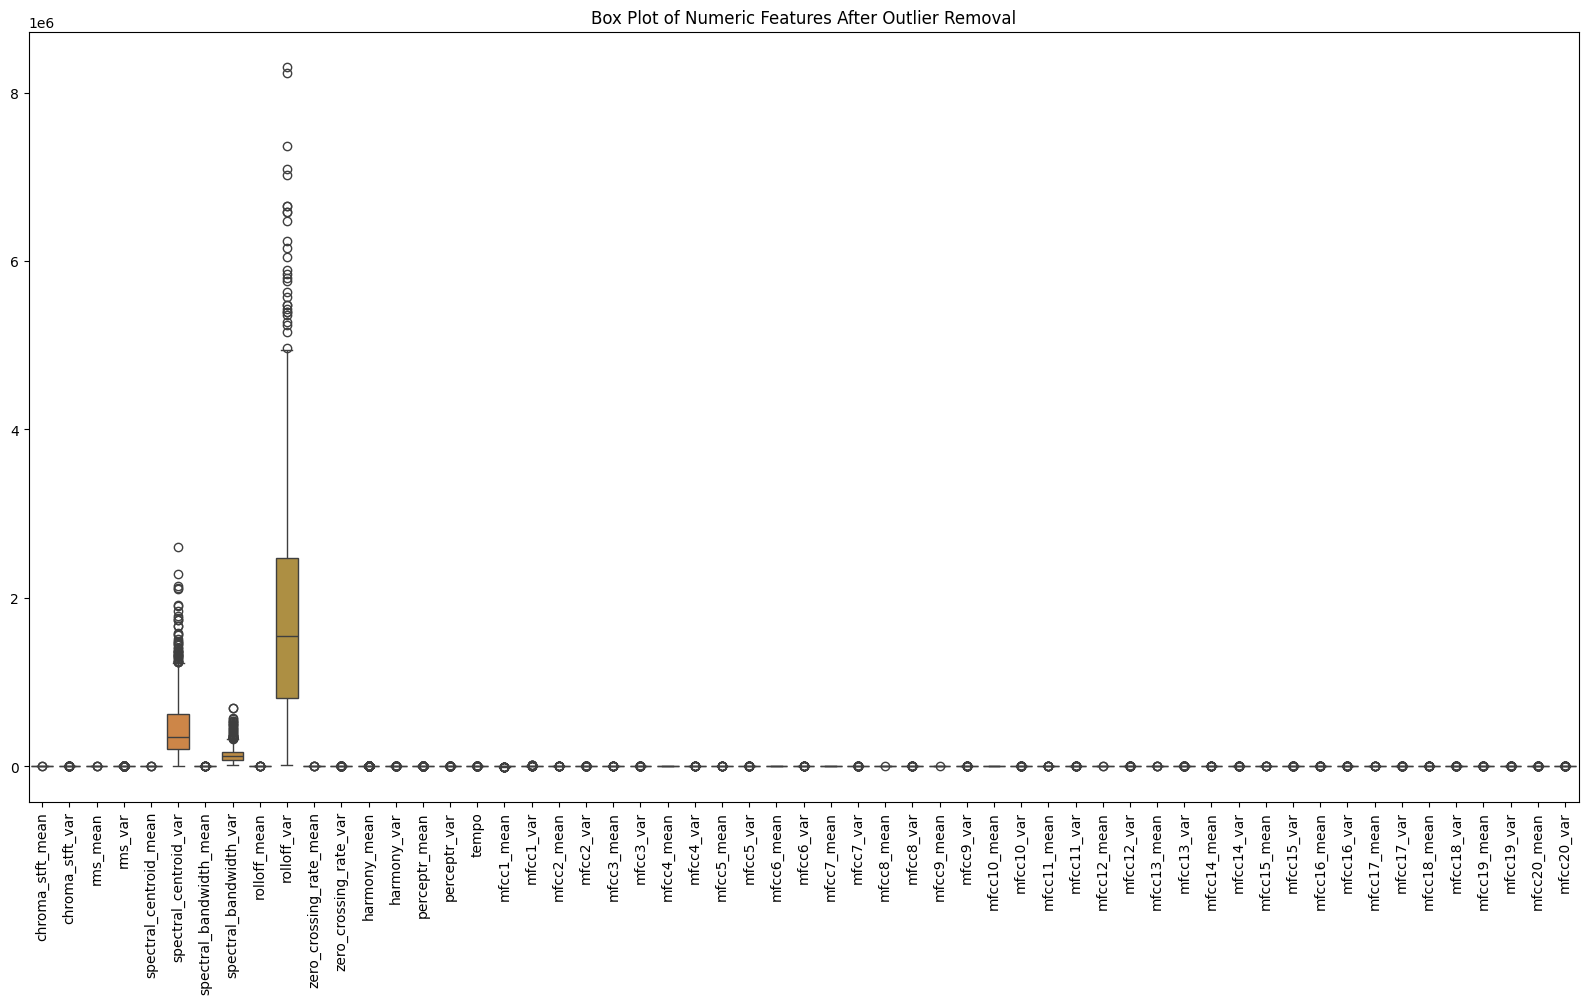

In [7]:
# Visualize the data after outlier removal
plt.figure(figsize=(20, 10))
sns.boxplot(data=X_clean[numeric_cols])
plt.title("Box Plot of Numeric Features After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [65]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (771, 57)
Testing data shape: (193, 57)


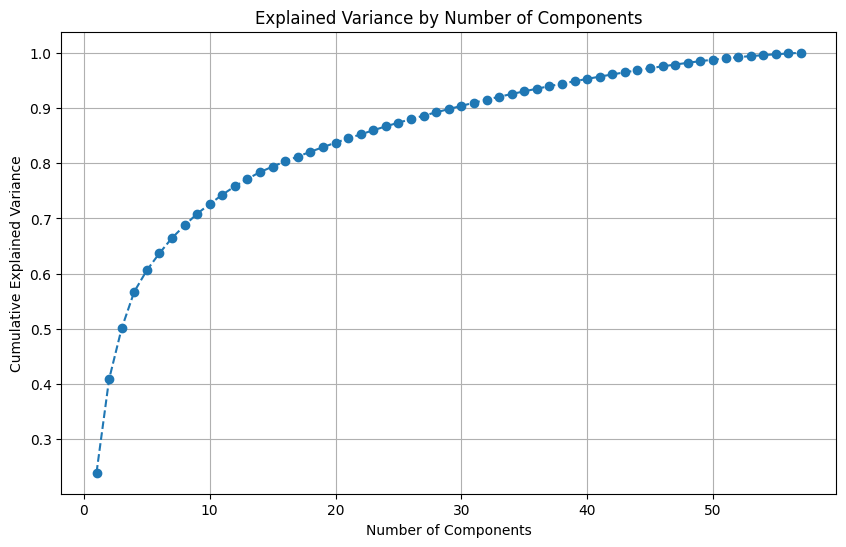

In [10]:
import matplotlib.pyplot as plt

# Fit PCA without reducing the number of components
pca = PCA()
pca.fit(X_scaled)

# Plot the cumulative explained variance to find the best number of PCA components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid()
plt.show()

In [67]:


# Preprocessing pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'pca__n_components': [i for i in range(40, 51)],  
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                         'classifier__n_estimators': [100, 200, 300],
                         'pca__n_components': [40, 41, 42, 43, 44, 45, 46, 47,
                                               48, 49, 50]},
             scoring='accuracy')

Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 300, 'pca__n_components': 41}
Classification report:
               precision    recall  f1-score   support

       blues       0.67      0.60      0.63        20
   classical       1.00      1.00      1.00        11
     country       0.76      0.72      0.74        18
       disco       0.65      0.65      0.65        23
      hiphop       0.53      0.64      0.58        14
        jazz       0.96      0.96      0.96        23
       metal       0.76      0.95      0.84        20
         pop       0.88      0.78      0.82        18
      reggae       0.70      0.73      0.71        22
        rock       0.70      0.58      0.64        24

    accuracy                           0.75       193
   macro avg       0.76      0.76      0.76       193
weighted avg       0.75      0.75      0.75       193



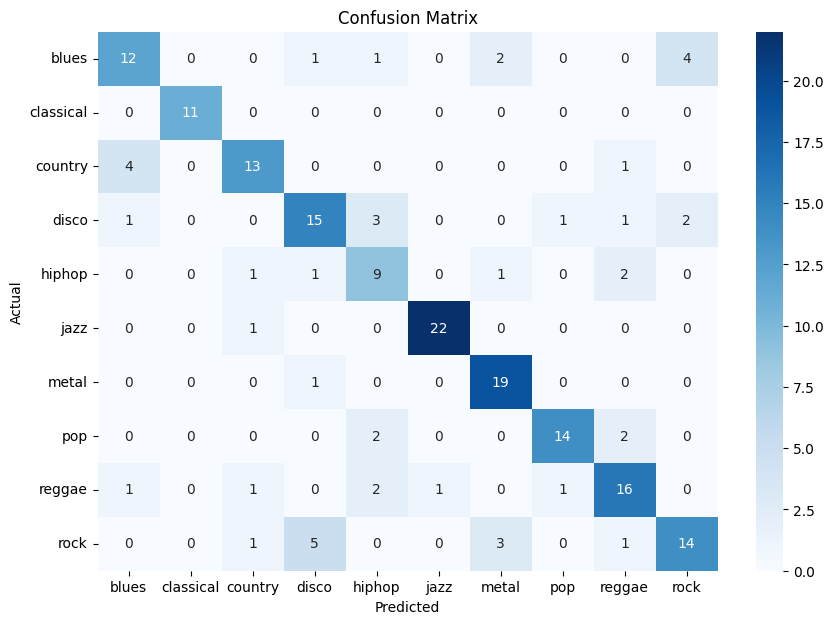

In [68]:

# Evaluate the model
y_pred = grid_search.predict(X_test)
print("Best parameters:", grid_search.best_params_)
print("Classification report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## MLP

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

pca = PCA(n_components=41)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape after PCA:", X_pca.shape)

Original shape: (964, 57)
Reduced shape after PCA: (964, 41)


In [71]:
X_train_MLP, X_test_MLP, y_train_MLP, y_test_MLP = train_test_split(X_pca, y_clean, test_size=0.2, random_state=42)


In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500, activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train_MLP, y_train_MLP)


MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=500, random_state=42)

Classification report:
               precision    recall  f1-score   support

       blues       0.85      0.85      0.85        20
   classical       0.85      1.00      0.92        11
     country       0.81      0.94      0.87        18
       disco       0.83      0.65      0.73        23
      hiphop       0.67      0.86      0.75        14
        jazz       1.00      0.87      0.93        23
       metal       0.87      1.00      0.93        20
         pop       0.89      0.94      0.92        18
      reggae       0.79      0.68      0.73        22
        rock       0.86      0.79      0.83        24

    accuracy                           0.84       193
   macro avg       0.84      0.86      0.85       193
weighted avg       0.85      0.84      0.84       193



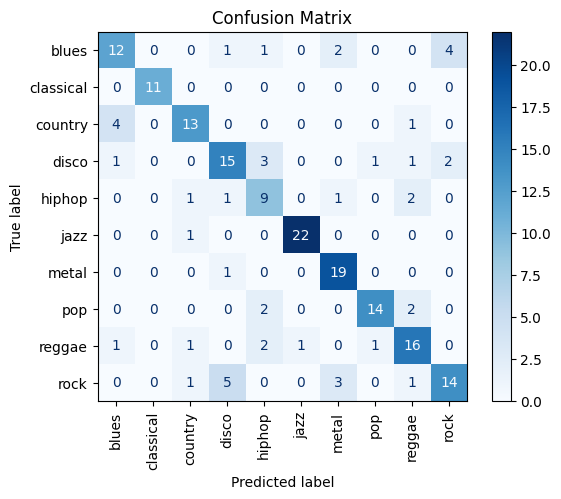

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on the test set
y_pred_MLP = mlp.predict(X_test_MLP)

# Calculate accuracy
accuracy = accuracy_score(y_test_MLP, y_pred_MLP)
print("Classification report:\n", classification_report(y_test, y_pred_MLP))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


## Visualization

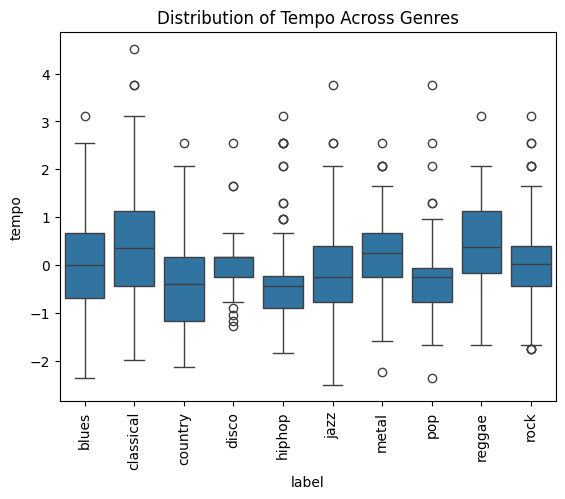

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Convert X_scaled back to DataFrame and add the label column
data = pd.DataFrame(X_scaled, columns=X_clean.columns)
data['label'] = y_clean.values

sns.boxplot(x='label', y='tempo', data=data)
plt.title('Distribution of Tempo Across Genres')
plt.xticks(rotation=90)
plt.show()




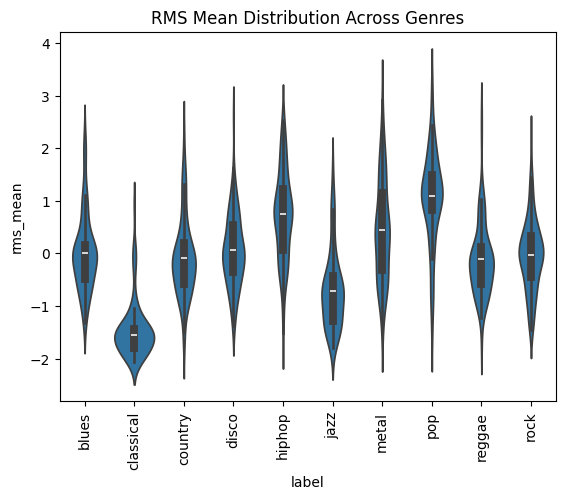

In [27]:
sns.violinplot(x='label', y='rms_mean', data=data)
plt.title('RMS Mean Distribution Across Genres')
plt.xticks(rotation=90)
plt.show()


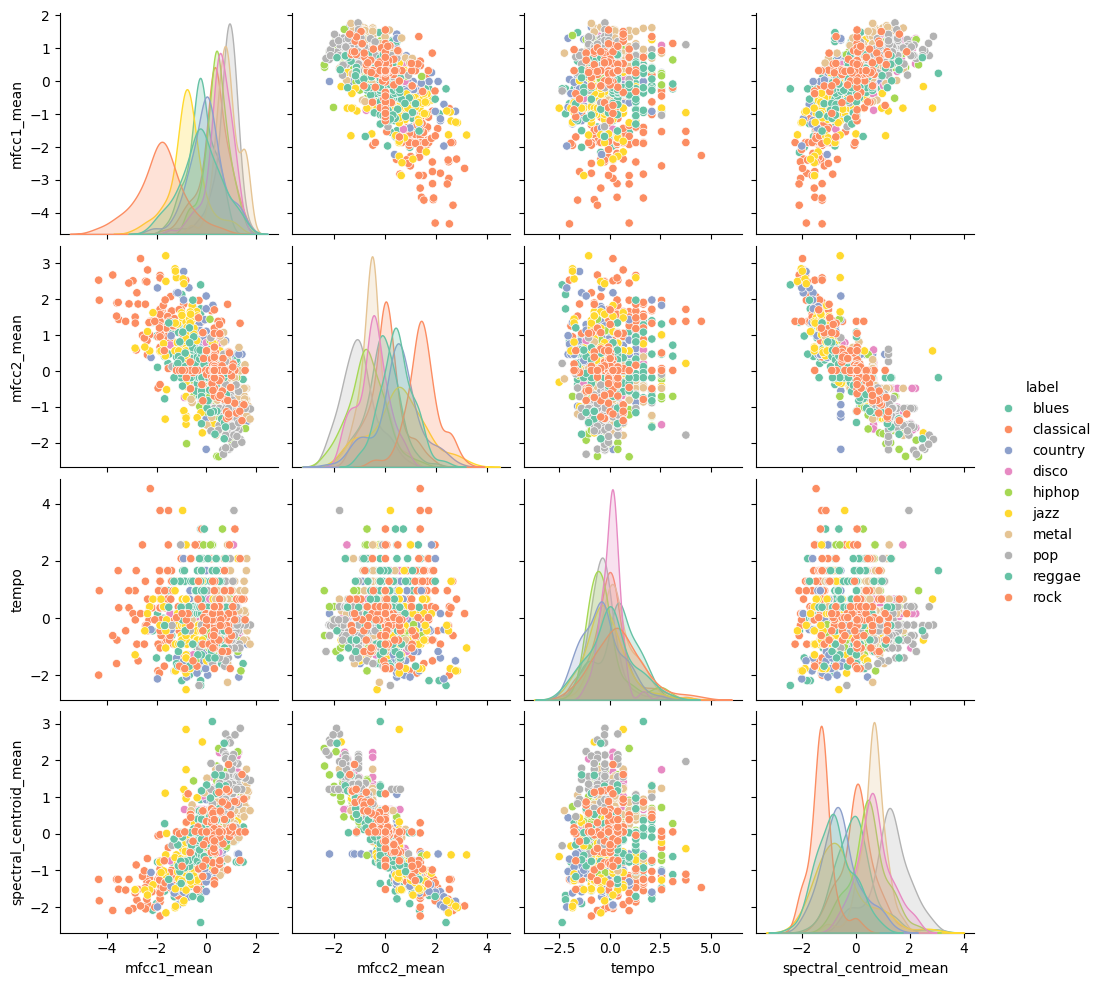

In [28]:
sns.pairplot(data, vars=['mfcc1_mean', 'mfcc2_mean', 'tempo', 'spectral_centroid_mean'], hue='label', palette='Set2')
plt.show()


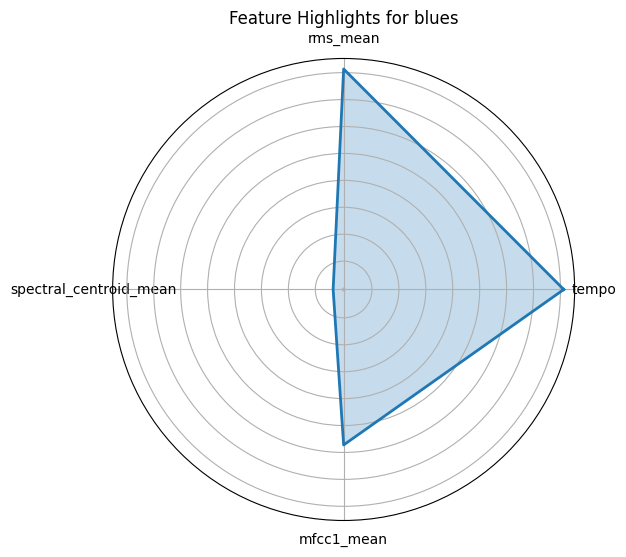

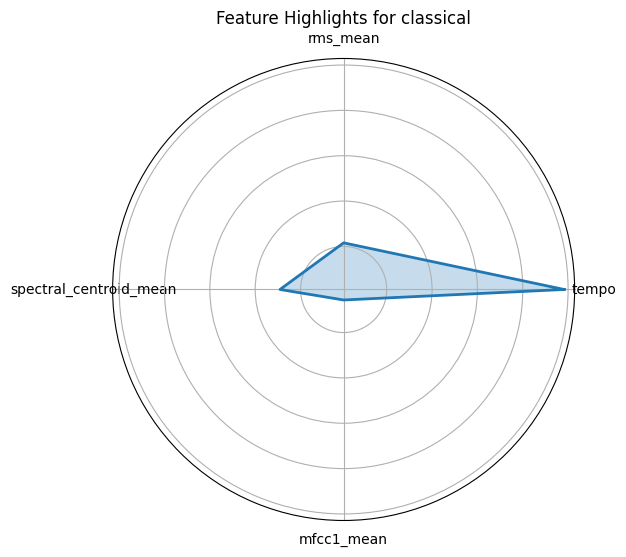

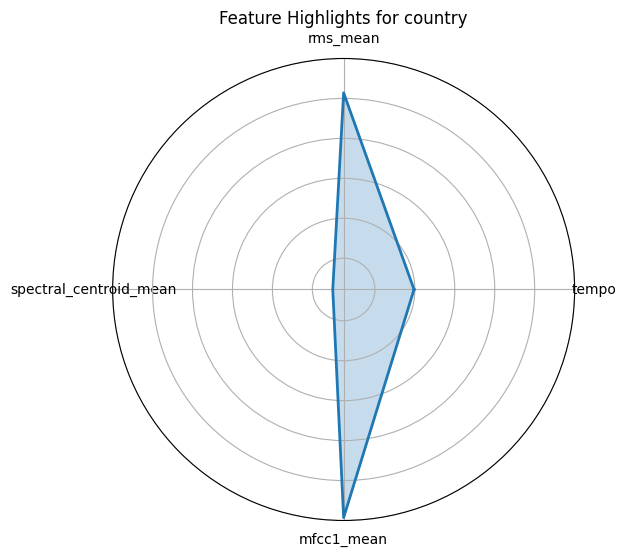

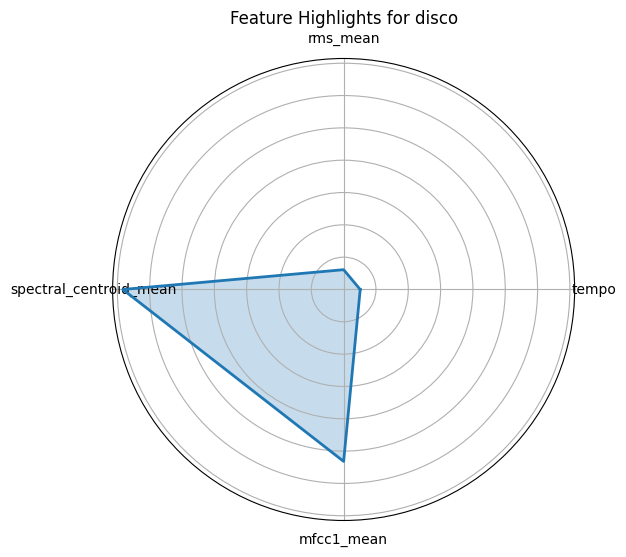

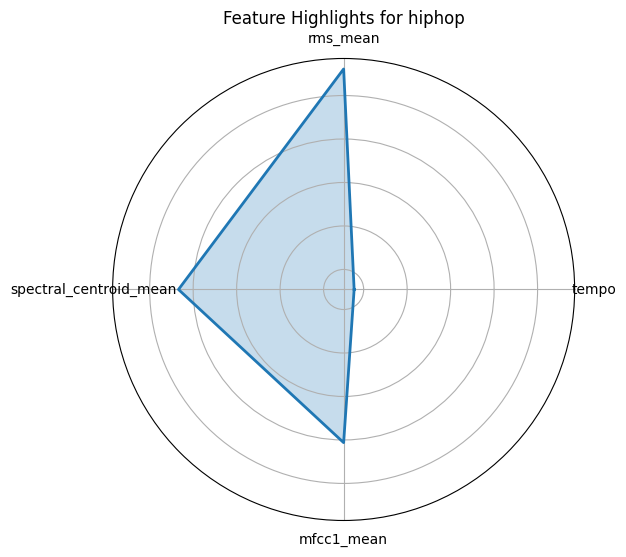

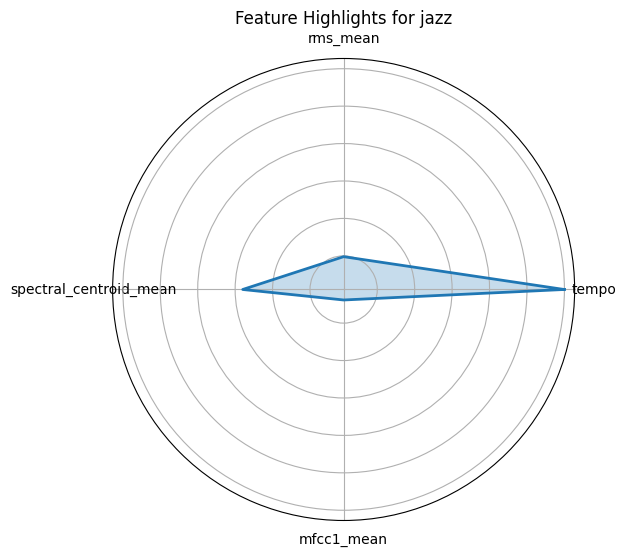

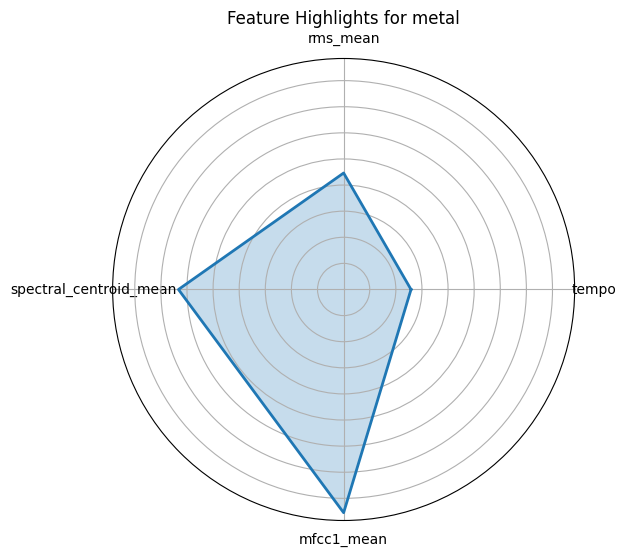

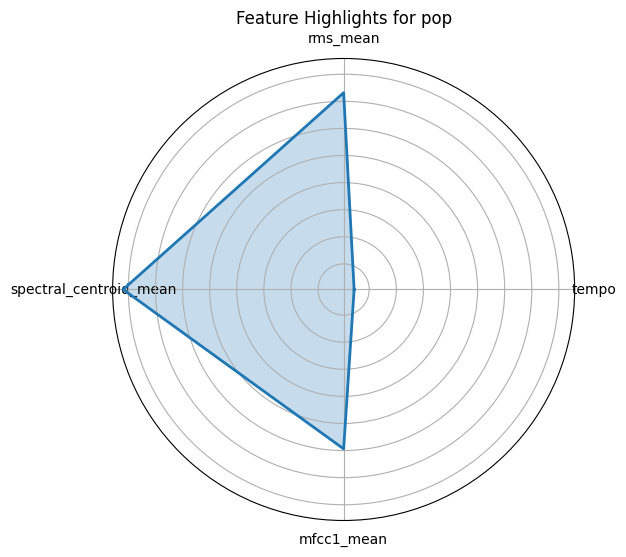

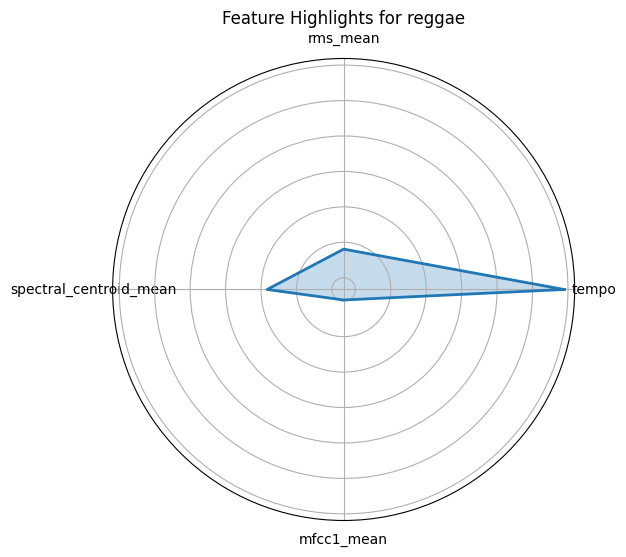

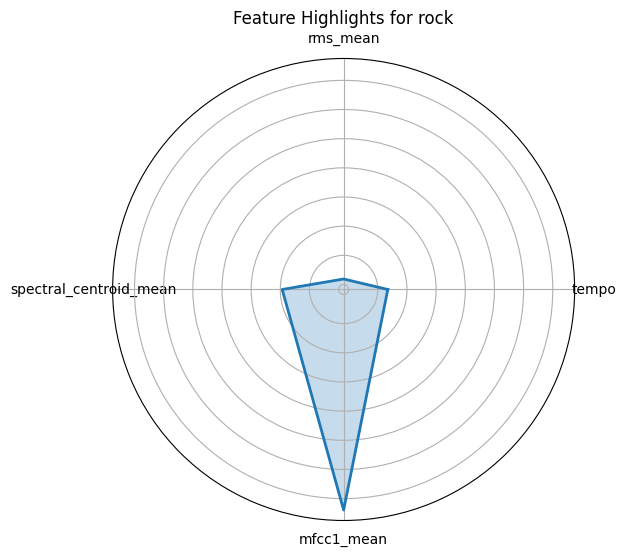

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean of selected features for each genre
genre_means = data.groupby('label').mean()[['tempo', 'rms_mean', 'spectral_centroid_mean', 'mfcc1_mean']]

# Create radar charts for each genre
categories = list(genre_means.columns)
num_categories = len(categories)

# Plot each genre as a separate radar chart
for genre in genre_means.index:
    values = genre_means.loc[genre].values.flatten().tolist()
    values += values[:1]  # Close the radar chart

    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=genre)
    ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(f'Feature Highlights for {genre}')
    plt.show()


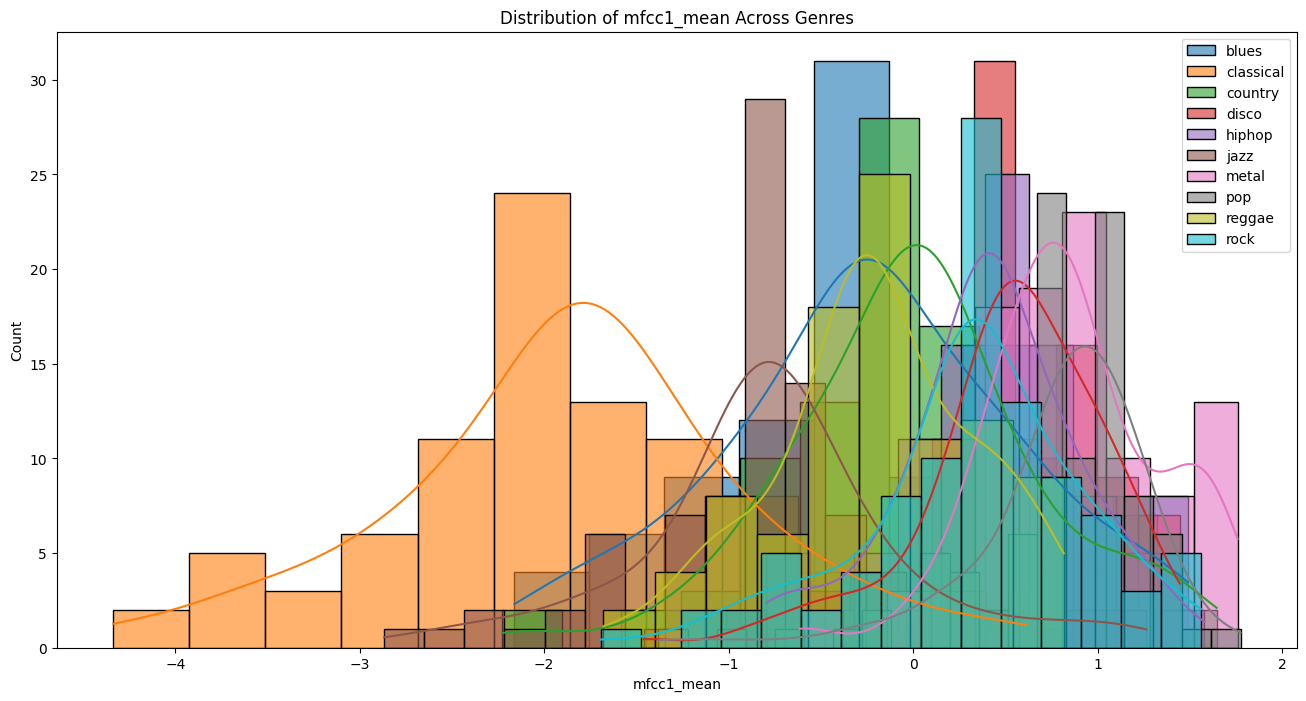

In [35]:
genres = data['label'].unique()
feature = 'mfcc1_mean'  # Replace with desired feature

plt.figure(figsize=(16, 8))
for genre in genres:
    subset = data[data['label'] == genre]
    sns.histplot(subset[feature], kde=True, label=genre, alpha=0.6)

plt.title(f'Distribution of {feature} Across Genres')
plt.xlabel(feature)
plt.legend()
plt.show()
